In [1]:
import jsonlines
import numpy as np
import pandas as pd

from RAG.BGE import bge_embedder
from RAG.Mistral import Mistral

In [2]:
data_path = '/home/yujie/Data/LongBench/data/2wikimqa.jsonl'

data_list = []

with jsonlines.open(data_path) as reader:
    for obj in reader:
        data_list.append(obj)

In [10]:
from tqdm import tqdm
ground_truths = []

for data in tqdm(data_list, desc="Processing Questions", unit="question"):
    ground_truth = data['answers'][0]
    ground_truths.append(ground_truth)

with open('ground_truths.txt', 'w') as f:
    for item in ground_truths:
        f.write("%s\n" % item)

Processing Questions: 100%|██████████| 200/200 [00:00<00:00, 817603.12question/s]


In [1]:
from evaluate import evaluator

In [2]:
with open('rag_answers.txt', 'r') as f:
    rag_answers = f.readlines()

with open('lc_answers.txt', 'r') as f:
    lc_answers = f.readlines()

with open('ground_truths.txt', 'r') as f:
    ground_truths = f.readlines()

rag_answers = [line.strip() for line in rag_answers]
lc_answers = [line.strip() for line in lc_answers]
ground_truths = [line.strip() for line in ground_truths]

In [4]:
evaluator(length=200,answers=rag_answers,ground_truths=ground_truths, save_path_and_name='/home/yujie/sparse_attn/evaluation/rag_evaluation.json')
evaluator(length=200,answers=lc_answers,ground_truths=ground_truths, save_path_and_name='/home/yujie/sparse_attn/evaluation/lc_evaluation.json')

[====================================================================================================] 100.00%

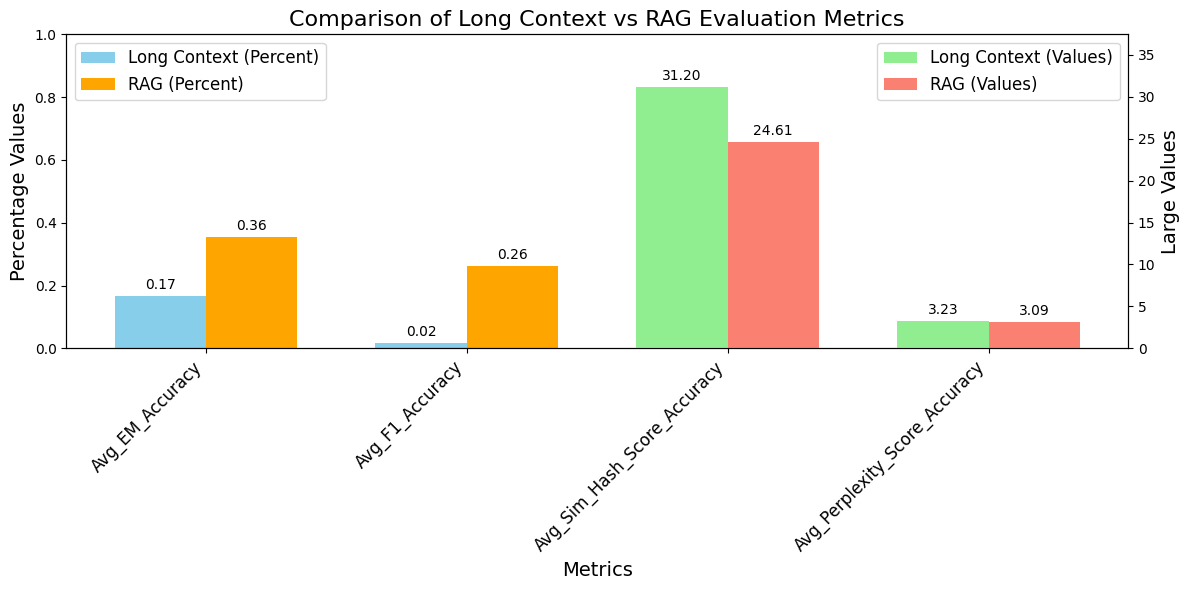

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 定义文件路径
lc_file_path = "/home/yujie/sparse_attn/evaluation/lc_evaluation.json"
rag_file_path = "/home/yujie/sparse_attn/evaluation/rag_evaluation.json"

# 读取 Long Context 数据
with open(lc_file_path, "r") as f:
    lc_data = json.load(f)

# 读取 RAG 数据
with open(rag_file_path, "r") as f:
    rag_data = json.load(f)

# 提取指标名称和对应的值
metrics = list(lc_data.keys())  # 指标名称
lc_values = [lc_data[metric] for metric in metrics]  # Long Context 值
rag_values = [rag_data[metric] for metric in metrics]  # RAG 值

# 分离百分比指标和数值较大指标
percent_metrics = ["Avg_EM_Accuracy", "Avg_F1_Accuracy"]
value_metrics = ["Avg_Sim_Hash_Score_Accuracy", "Avg_Perplexity_Score_Accuracy"]

# 设置绘图参数
x = np.arange(len(metrics))  # 横坐标位置
width = 0.35  # 柱状图宽度

fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制百分比指标的柱状图
bars_lc_percent = ax1.bar(
    x[:2] - width / 2,
    lc_values[:2],
    width,
    label="Long Context (Percent)",
    color="skyblue",
)
bars_rag_percent = ax1.bar(
    x[:2] + width / 2,
    rag_values[:2],
    width,
    label="RAG (Percent)",
    color="orange",
)

# 设置第一个 Y 轴
ax1.set_ylabel("Percentage Values", fontsize=14)
ax1.set_ylim(0, 1)  # 百分比范围限制在 0 到 1
ax1.tick_params(axis="y")
ax1.legend(loc="upper left", fontsize=12)

# 创建第二个 Y 轴
ax2 = ax1.twinx()
bars_lc_value = ax2.bar(
    x[2:] - width / 2,
    lc_values[2:],
    width,
    label="Long Context (Values)",
    color="lightgreen",
)
bars_rag_value = ax2.bar(
    x[2:] + width / 2,
    rag_values[2:],
    width,
    label="RAG (Values)",
    color="salmon",
)

# 设置第二个 Y 轴
ax2.set_ylabel("Large Values", fontsize=14)
ax2.set_ylim(0, max(max(lc_values[2:]), max(rag_values[2:])) * 1.2)  # 动态调整范围
ax2.tick_params(axis="y")
ax2.legend(loc="upper right", fontsize=12)

# 设置横轴标签
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45, ha="right", fontsize=12)
ax1.set_xlabel("Metrics", fontsize=14)

# 添加标题
plt.title("Comparison of Long Context vs RAG Evaluation Metrics", fontsize=16)

# 在柱状图上显示数值
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=10,
        )

# 为百分比指标添加数值标注
add_labels(bars_lc_percent, ax1)
add_labels(bars_rag_percent, ax1)

# 为数值较大指标添加数值标注
add_labels(bars_lc_value, ax2)
add_labels(bars_rag_value, ax2)

# 显示图表
plt.tight_layout()
plt.show()

In [3]:
from modelscope.msdatasets import MsDataset
ds =  MsDataset.load('iic/Loong', subset_name='default', split='train')

2025-03-18 02:17:38,543 - modelscope - WARNING - Use trust_remote_code=True. Will invoke codes from Loong. Please make sure that you can trust the external codes.
2025-03-18 02:17:39,500 - modelscope - WARNING - Use trust_remote_code=True. Will invoke codes from iic/Loong. Please make sure that you can trust the external codes.
2025-03-18 02:17:39,502 - modelscope - WARNING - Use trust_remote_code=True. Will invoke codes from iic/Loong. Please make sure that you can trust the external codes.
2025-03-18 02:17:39,503 - modelscope - WARNING - Use trust_remote_code=True. Will invoke codes from iic/Loong. Please make sure that you can trust the external codes.


In [5]:
ds['image']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1874x530>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=784x994>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3556x2034>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1596x1400>]

In [4]:
import jsonlines

path = '/home/yujie/Data/loong/loong.jsonl'

data_list = []
with jsonlines.open(path) as reader:
    for obj in reader:
        data_list.append(obj)

In [5]:
data_list[0]

{'level': 3,
 'set': 1,
 'length': 49739,
 'type': 'paper',
 'language': 'en',
 'question': 'OpenMoE: An Early Effort on Open Mixture-of-Experts Language Models',
 'instruction': 'We hope you will carefully study the provided papers and determine the citation relationships between them. Please follow the instructions below strictly to complete the task:\n\n#Specific Requirements:\n1. Reference: When a given paper mentions other provided papers, those other papers are considered as "references" for the given paper. To summarize in this specific context, references are about what the given paper is using.\n2. Citation: Conversely, when other provided papers mention the given paper in their works, the given paper is being "cited" by those other papers. To summarize in this specific context, citations are about who is using the given paper.\n3. Given a paper, you need to determine the citation or reference relationship between this paper and the other papers. Do not consider papers that ar

In [7]:
data_list[0]['prompt_template']

'#Papers:\n{docs}\n\n{instruction}\n\n#The paper you need to analyze:\n{question}'